# The simplest demo of the various algorithms

Before attempting to handle the Off-Policy case with General Value Functions, it would be instructive to first examine how the algorithms perform in the On-Policy case with (more or less) fixed parameters.

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import algos
import features
import parametric
import policy
import chicken
from agents import OnPolicyAgent
from rlbench import *

We have a number of algorithms that we can try

In [16]:
algos.algo_registry

{'ETD': algos.ETD,
 'GTD': algos.GTD,
 'GTD2': algos.GTD2,
 'LSTD': algos.LSTD,
 'TD': algos.TD,
 'TDC': algos.TDC}

We define an environment and an associated feature function, and set out parameters (or parameter functions) for the experiment.

In order to test these algorithms in an efficient and consistent manner, we have an `OnPolicyAgent` wrapper class that handles the work of performing function approximation and providing the algorithms with the right parameters in the right order.
This makes things a little bit simpler to work with (since we've registered all of the algorithms via metaclass programming) and can just re-use the same parameters, trusting that the unneeded ones won't actually be used by the Agent. 

Then, we just run the experiment for each algorithm and plot the results.

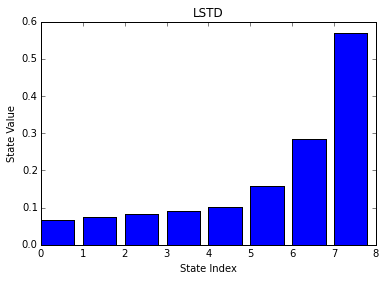

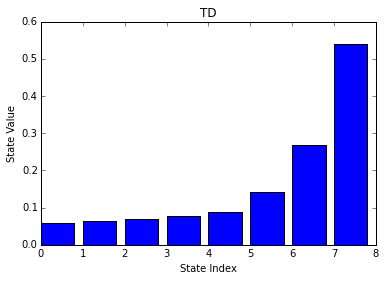

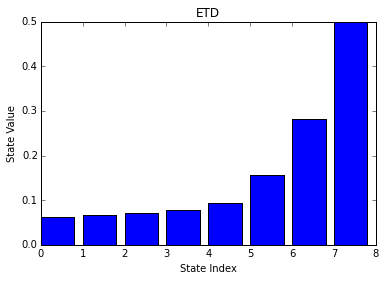

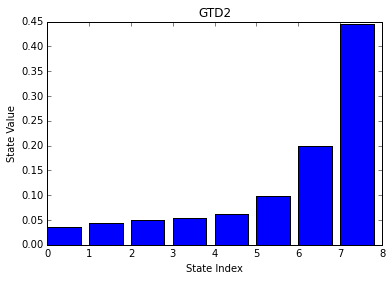

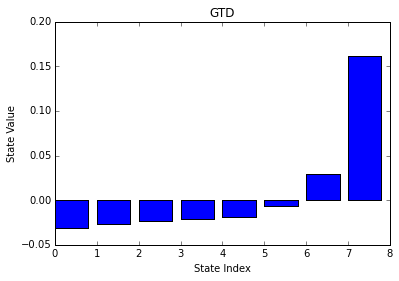

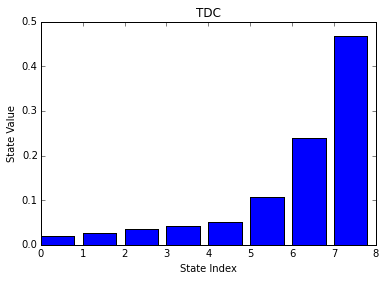

In [24]:
# define the experiment
num_states = 8
num_features = 8
max_steps = 100000

# set up environment
env = chicken.Chicken(num_states)

# set up policy
pol_pi = policy.FixedPolicy({s: {0: 1} if s < 4 else {0: 0.5, 1: 0.5} for s in env.states})

# set feature mapping
# phi = features.RandomBinary(num_features, num_features // 2, random_seed=101011)
phi = features.Int2Unary(num_states)

# set up algorithms
update_params = {
    'alpha': 0.01,
    'beta': 0.0001,
    'gm': 0.9,
    'gm_p': 0.9,
    'lm': 0.0,
    'lm_p': 0.0,
    'interest': 1.0,
}

# Run all available algorithms 
for name, alg in algos.algo_registry.items():
    # Set up the agent, run the experiment, get state-values
    agent = OnPolicyAgent(alg(phi.length), pol_pi, phi, update_params)
    steps = run_episode(agent, env, max_steps)
    values = agent.get_values(env.states)

    # plot the results
    xvals = list(sorted(env.states))
    yvals = [values[x] for x in xvals]
    plt.title(name)
    plt.xlabel('State Index')
    plt.ylabel('State Value')
    plt.bar(xvals, yvals)
    plt.show()

# Running a Single Experiment

To run just a single on-policy experiment, we can do the following:

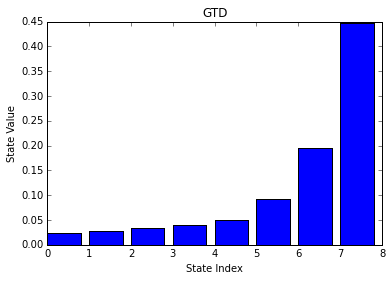

In [29]:
# define the experiment
num_states = 8
num_features = 8
max_steps = 100000

# set up environment
env = chicken.Chicken(num_states)

# set up policy
pol_pi = policy.FixedPolicy({s: {0: 1} if s < 4 else {0: 0.5, 1: 0.5} for s in env.states})

# set feature mapping
# phi = features.RandomBinary(num_features, num_features // 2, random_seed=101011)
phi = features.Int2Unary(num_states)

# set up algorithms
update_params = {
    'alpha': 0.1,
    'beta': 0.001,
    'gm': 0.9,
    'gm_p': 0.9,
    'lm': 0.0,
    'lm_p': 0.0,
    'interest': 1.0,
}


# Choose an algorithm to run
name = 'GTD'
alg = algos.algo_registry[name]

# Set up the agent, run the experiment, get state-values
agent = OnPolicyAgent(alg(phi.length), pol_pi, phi, update_params)
steps = run_episode(agent, env, max_steps)
values = agent.get_values(env.states)

# plot the results
xvals = list(sorted(env.states))
yvals = [values[x] for x in xvals]
plt.title(name)
plt.xlabel('State Index')
plt.ylabel('State Value')
plt.bar(xvals, yvals)
plt.show()